Credit card fraud detection
dataset: kaggle.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

Data preparation

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/creditcard_2023.csv')

In [4]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
df.shape

(568630, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [7]:
df.describe()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [8]:
df1 = df.drop('id', axis=1) #nincs ra szukseg

PCA


A PCA (Principal Component Analysis) kihasználja a multikollinearitás előnyeit, és az erősen korrelált változókat nem korrelált változók halmazává egyesíti.Ezért a PCA hatékonyan kiküszöbölheti a multikollinearitást a funkciók között.

In [9]:
from sklearn.feature_selection import VarianceThreshold

X = df1.drop(['Class'], axis=1)
y = df1['Class']
vth = VarianceThreshold(threshold=0)
vth.fit(X)
print(vth.get_support())

constent_features = [
        feat for feat in X.columns if X[feat].std() == 0
    ]

print("Constant Features are : {} ".format(constent_features))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
Constant Features are : [] 


In [10]:
df1.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,-0.561184,0.484499,-0.498963,0.517462,0.354728,0.573381,-0.226757,0.548973,0.599108,...,-0.034669,-0.073729,-0.068917,-0.014651,-0.008508,0.009281,-0.122772,0.070111,-0.001280,-0.505761
V2,-0.561184,1.000000,-0.627810,0.579638,-0.631669,-0.341040,-0.694022,0.191321,-0.585095,-0.621798,...,-0.013570,0.035346,0.151906,-0.027515,0.132443,0.012219,0.053835,0.021071,-0.000076,0.491878
V3,0.484499,-0.627810,1.000000,-0.687726,0.510351,0.508974,0.634336,-0.263018,0.648615,0.707676,...,-0.021710,-0.041970,-0.058884,0.076460,-0.076332,-0.052056,-0.190582,0.005346,-0.002001,-0.682095
V4,-0.498963,0.579638,-0.687726,1.000000,-0.429243,-0.474403,-0.588648,0.199013,-0.676648,-0.712839,...,-0.013093,0.091197,0.043266,-0.102508,0.029402,0.136679,0.188036,-0.011316,0.001859,0.735981
V5,0.517462,-0.631669,0.510351,-0.429243,1.000000,0.245187,0.586828,-0.314975,0.479614,0.563874,...,0.034147,-0.119152,-0.113919,-0.083243,-0.047845,0.047771,-0.043759,0.108422,-0.000016,-0.338639
V6,0.354728,-0.341040,0.508974,-0.474403,0.245187,1.000000,0.418703,-0.604491,0.432241,0.471000,...,-0.040153,0.036896,0.308598,-0.005237,-0.195340,-0.067605,-0.260783,-0.065641,0.000734,-0.435088
V7,0.573381,-0.694022,0.634336,-0.588648,0.586828,0.418703,1.000000,-0.180986,0.601789,0.678004,...,0.019627,-0.104043,-0.111177,-0.004152,0.000802,-0.006488,-0.036557,0.040732,0.001326,-0.491234
V8,-0.226757,0.191321,-0.263018,0.199013,-0.314975,-0.604491,-0.180986,1.000000,-0.208557,-0.199995,...,0.056416,-0.098752,-0.463649,0.083272,0.322639,0.040448,0.298398,0.046017,-0.000208,0.144294
V9,0.548973,-0.585095,0.648615,-0.676648,0.479614,0.432241,0.601789,-0.208557,1.000000,0.748487,...,0.131001,-0.204723,-0.042371,0.044006,-0.034885,-0.131000,-0.111842,0.069959,-0.001589,-0.585522
V10,0.599108,-0.621798,0.707676,-0.712839,0.563874,0.471000,0.678004,-0.199995,0.748487,1.000000,...,0.037426,-0.150957,-0.056285,0.045935,-0.014045,-0.053684,-0.134907,0.035646,-0.001259,-0.673665


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_data_training = scaler.transform(X_train)

print("Shape of the original data : {} ".format(scaled_data_training.shape))
for i in np.arange(0.9, 1, 0.01):
    pca = PCA(i)
    pca.fit(scaled_data_training)
    x_pca = pca.transform(scaled_data_training)
    print("Shape of the PCA data with {} variance : {} ".format(i,x_pca.shape))

Shape of the original data : (454904, 29) 
Shape of the PCA data with 0.9 variance : (454904, 17) 
Shape of the PCA data with 0.91 variance : (454904, 18) 
Shape of the PCA data with 0.92 variance : (454904, 19) 
Shape of the PCA data with 0.93 variance : (454904, 20) 
Shape of the PCA data with 0.9400000000000001 variance : (454904, 21) 
Shape of the PCA data with 0.9500000000000001 variance : (454904, 22) 
Shape of the PCA data with 0.9600000000000001 variance : (454904, 23) 
Shape of the PCA data with 0.9700000000000001 variance : (454904, 24) 
Shape of the PCA data with 0.9800000000000001 variance : (454904, 26) 
Shape of the PCA data with 0.9900000000000001 variance : (454904, 27) 


In [ ]:
scaled_data_testing = scaler.transform(X_test)

In [ ]:
pca = PCA(0.95)
pca.fit(scaled_data_training)
final_training_data = pca.transform(scaled_data_training)
final_testing_data = pca.transform(scaled_data_testing)

In [ ]:
#ellenorzes
print('Shape of Training Data : {} '.format(final_training_data.shape))
print('Shape of Testing Data : {} '.format(final_testing_data.shape))

Shape of Training Data : (454904, 22) 
Shape of Testing Data : (113726, 22) 


**Pattern - Analízis t-SNE-vel**

Az SNE hasznos a csalások felderítésére, mert lehetővé teszi a nagy dimenziós adatok megjelenítését, megkönnyíti az anomáliák felderítését, segít a funkciók tervezésében.

In [ ]:
non_fraud = df1[df1['Class'] == 0].sample(1000)
fraud = df1[df1['Class'] == 1].sample(1000)


In [ ]:
#features és labels
df = pd.concat([non_fraud, fraud],ignore_index = True)
X = df1.drop(['Class'], axis = 1).values
y = df1["Class"].values

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(X, y, name, title='TSNE plot of Fraud and Non Fraud'):

    tsne = TSNE(n_components=2, random_state=24, init='random', learning_rate=200)

    X_t = tsne.fit_transform(X)

    plt.figure(figsize=(12,8))
    plt.scatter(X_t[np.where(y==0), 0], X_t[np.where(y==0), 1], color='darkorange', alpha=0.7, label="Non Fraud")
    plt.scatter(X_t[np.where(y==1), 0], X_t[np.where(y==1), 1], color='mediumblue', alpha=0.7, label="Fraud")
    plt.legend(loc='best')
    plt.title(title, fontsize=16)
    plt.show()

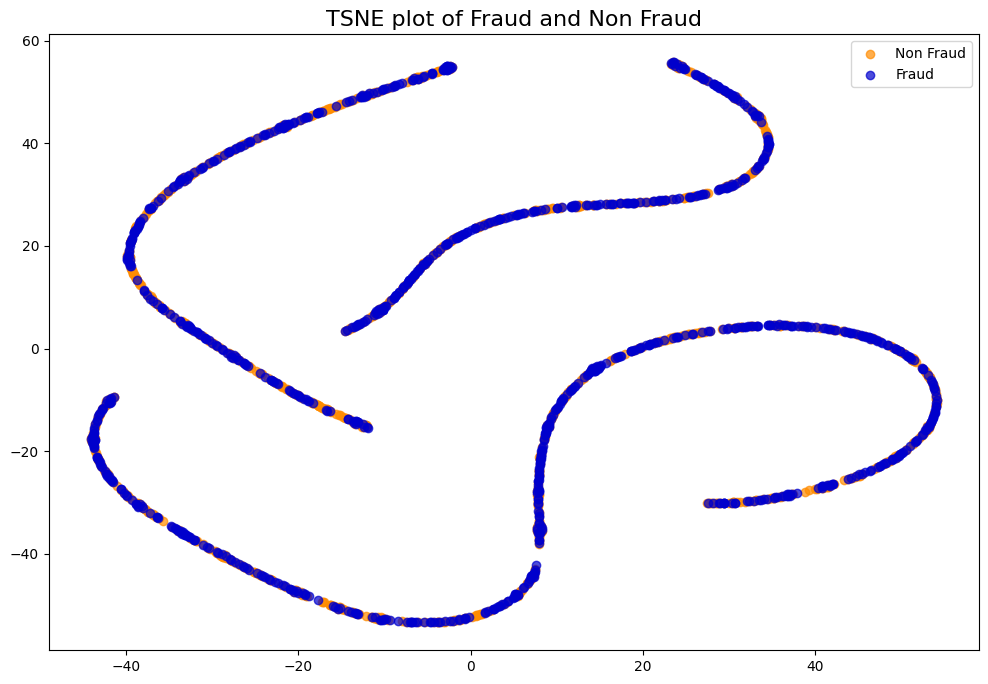

In [ ]:
tsne_plot(X, y, name="original.png")

Isolation Forest

In [13]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

def cap_outliers_in_dataframe(df):
    capped_df = df.copy()

    for column in capped_df.columns:
        if np.issubdtype(capped_df[column].dtype, np.number):
            outliers = find_outliers_iqr(capped_df[column])


            Q1 = capped_df[column].quantile(0.25)
            Q3 = capped_df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            capped_df[column] = np.where(outliers, np.clip(capped_df[column], lower_bound, upper_bound), capped_df[column])

    return capped_df

capped_df = cap_outliers_in_dataframe(df)

In [14]:
capped_df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.745732,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [15]:
import plotly.express as px
correlation_matrix = capped_df.select_dtypes(include='number').corr()

fig_corr_matrix = px.imshow(correlation_matrix,
                            x=correlation_matrix.columns,
                            y=correlation_matrix.columns,
                            color_continuous_scale='Greens',
                            title='Interactive Correlation Matrix')


fig_corr_matrix.update_layout(width=1200, height=900)
fig_corr_matrix.show()

In [16]:
threshold = 0.9
corr_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            corr_features.add(colname)

capped_df.drop(corr_features, axis=1, inplace=True)

In [17]:
column_drop = ['id','Class']

df_2  = capped_df.drop(columns=column_drop)

In [18]:
df_2.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [19]:
from sklearn.pipeline import Pipeline
from sklearn. preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [20]:
#pipeline
pipeline = Pipeline([
    ('scaler' ,StandardScaler()),
    ('isolation_forest',IsolationForest(n_estimators=100, max_samples='auto', contamination='auto',
                                         max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, ))


])

In [21]:
pipeline.fit(df_2)

Pipeline(steps=[('scaler', StandardScaler()),
                ('isolation_forest',
                 IsolationForest(n_jobs=-1, random_state=42))])

In [22]:
prediction = pipeline.predict(df_2)

In [23]:
anomaly  = df_2[prediction==-1].to_numpy()
normal = df_2[prediction==1].to_numpy()

In [24]:
df2_index = np.where(prediction<0)
df2_index

(array([    18,     51,     82, ..., 568622, 568623, 568624]),)

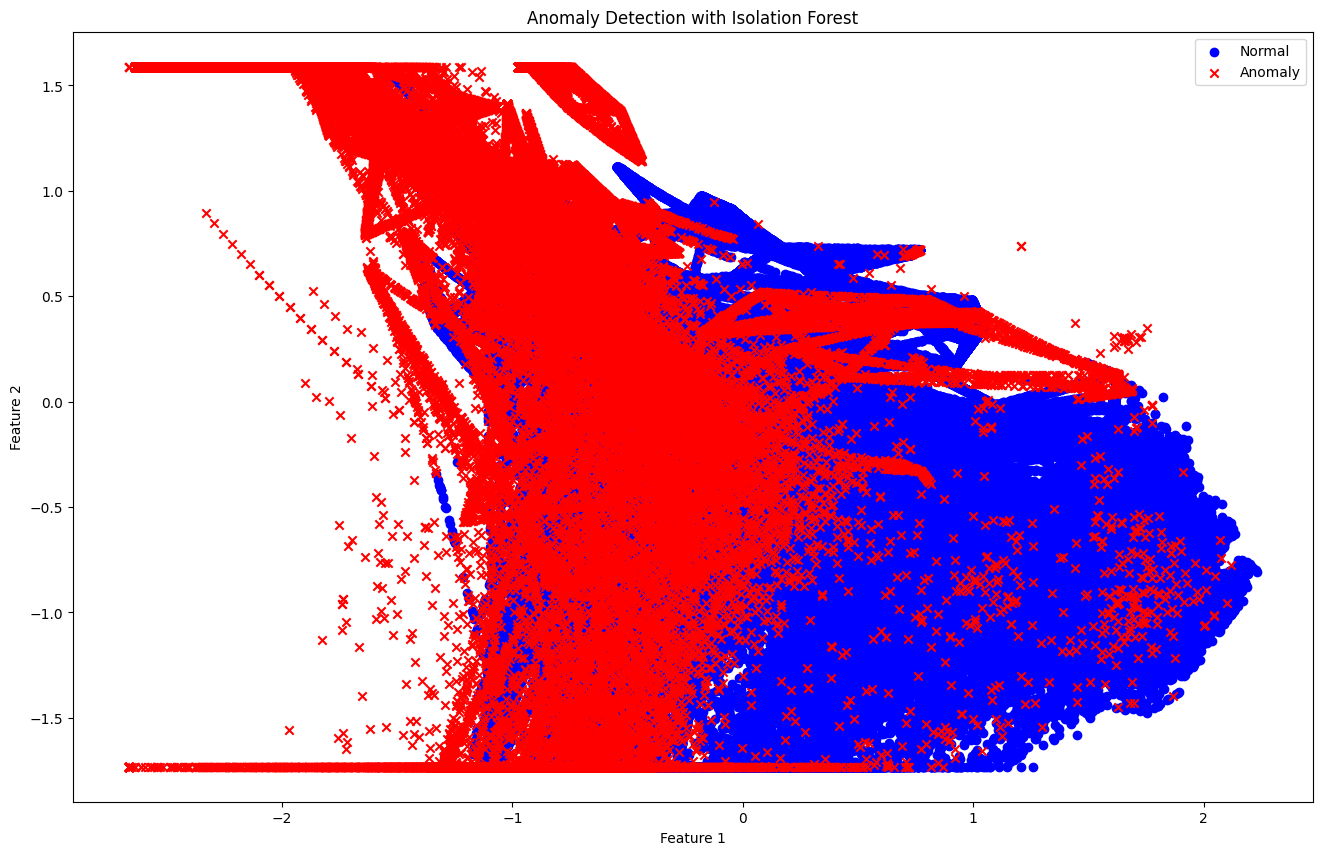

In [25]:
plt.figure(figsize=(16, 10))
plt.scatter(normal[:, 0], normal[:, 1], c='b', marker='o', label='Normal')
plt.scatter(anomaly[:, 0], anomaly[:, 1], c='r', marker='x', label='Anomaly')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Detection with Isolation Forest')
plt.legend(loc='best')

plt.show()

CNN Model

In [43]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [27]:
random_state = 123
features = [col for col in df.columns if col not in ['id', 'Class']]
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Class'], test_size=0.3, random_state=random_state, stratify=df['Class'], shuffle=True)

In [30]:
import time

In [44]:
def plot_history(history):
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def show_model_results(model):
    pred = model.predict(X_test)
    pred = np.where(pred > 0.5, 1, 0)
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [36]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        min_delta=1e-2,
        patience=2,
        verbose=1,
    )
]

Epoch 1/20
622/622 [==============================] - 4s 5ms/step - loss: 0.1606 - accuracy: 0.9477 - val_loss: 0.1005 - val_accuracy: 0.9629
Epoch 2/20
622/622 [==============================] - 3s 4ms/step - loss: 0.0882 - accuracy: 0.9670 - val_loss: 0.0808 - val_accuracy: 0.9696
Epoch 3/20
622/622 [==============================] - 3s 4ms/step - loss: 0.0737 - accuracy: 0.9721 - val_loss: 0.0698 - val_accuracy: 0.9738
Epoch 4/20
622/622 [==============================] - 3s 5ms/step - loss: 0.0639 - accuracy: 0.9758 - val_loss: 0.0608 - val_accuracy: 0.9764
Epoch 5/20
622/622 [==============================] - 3s 5ms/step - loss: 0.0562 - accuracy: 0.9785 - val_loss: 0.0538 - val_accuracy: 0.9802
Epoch 6/20
622/622 [==============================] - 3s 4ms/step - loss: 0.0498 - accuracy: 0.9809 - val_loss: 0.0479 - val_accuracy: 0.9824
Epoch 7/20
622/622 [==============================] - 3s 4ms/step - loss: 0.0444 - accuracy: 0.9834 - val_loss: 0.0431 - val_accuracy: 0.9853
Epoch 

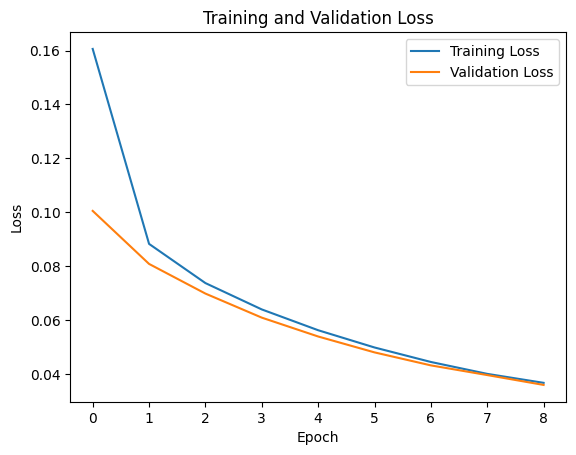

In [45]:
def create_cnnmodel(input_length):
    # Define model architecture
    model = keras.Sequential([
        Conv1D(filters=5, kernel_size=10, activation="relu", input_shape=(input_length, 1), strides=2),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

start_time = time.time()
cnn_model = create_cnnmodel(len(features))
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

5331/5331 [==============================] - 13s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85295
           1       0.99      0.99      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



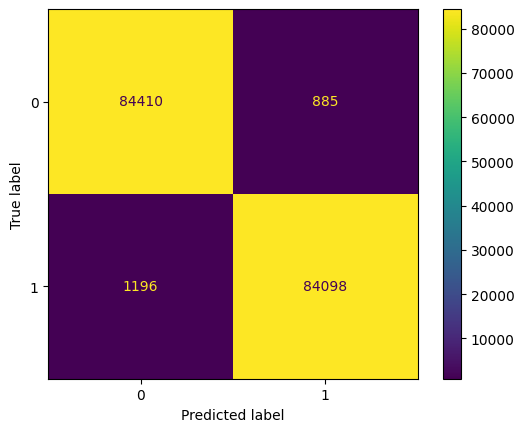

In [46]:
show_model_results(cnn_model)


In [47]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 10, 5)             55        
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 5, 5)              0         
 g1D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 25)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                832       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 920 (3.59 KB)
Trainable params: 920 (3.59 KB)
Non-trainable params: 0 (0.00 Byte)
________________________